In [34]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import glob
from wordcloud import WordCloud
import json
from collections import Counter
import seaborn as sns

In [35]:
path = r'C:\Users\m216102\Documents\Capstone\twitterCapture\january'   
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
li = []
for file in all_files:
    df = pd.read_csv(file, index_col = None, header=0)   #list of data frames
    li.append(df)

In [36]:
#name the columns
for i in range(len(li)): 
    li[i].columns = ['Date', 'id', 'tweet', 'tweet_info', 'metadata']


In [37]:
frames = []
#Concatenate all files into one dataset 
for i in range(len(li)): 
    frames.append(li[i])
data = pd.concat(frames, ignore_index= True)

In [38]:
data.drop(['Date'], inplace=True, axis=1) 
data.drop(['tweet_info'], inplace=True, axis=1)
data.drop(['metadata'], inplace=True, axis=1)
data.shape

(118367, 2)

In [48]:
data.head()

,id,tweet
0,1348132465689337860,b'RT @chelseahandler: Congrats to Twitter for ...
1,1348132465613922306,"b""RT @TimRunsHisMouth: What are the odds that ..."
2,1348132465580322817,b'RT @Univers_Bangtan: \xf0\x9f\x93\xa5 ARMYS ...
3,1348132465525706756,b'RT @nowthisnews: \xe2\x80\x98I wanted to kno...
4,1348132465483730946,b'RT @btsvotingorg: K-ARMYs mass voting hashta...


In [56]:
#function to collect hashtags 
def HashTags(x): 
    hashtags = []
    #Loop over the words in the tweet
    for i in x: 
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags 

In [57]:
tags = HashTags(data['tweet'])
freq = nltk.FreqDist(sum(tags, [])) 
hashtags = pd.DataFrame({'HashTags' : list(freq.keys()),'Values' : list(freq.values())})
hashtags.tail

<bound method NDFrame.tail of                    HashTags  Values
0                      SB19      15
1     EffectiveMultilateral      16
2              AmericaFirst      30
3                         7       6
4                 TrumpCult       3
...                     ...     ...
4078       CapitolHillSiege       1
4079             TrumpTapes       1
4080      RemoveCountryCaps       1
4081          117thCongress       1
4082             UnitedStat       1

[4083 rows x 2 columns]>

<AxesSubplot:xlabel='HashTags', ylabel='Values'>

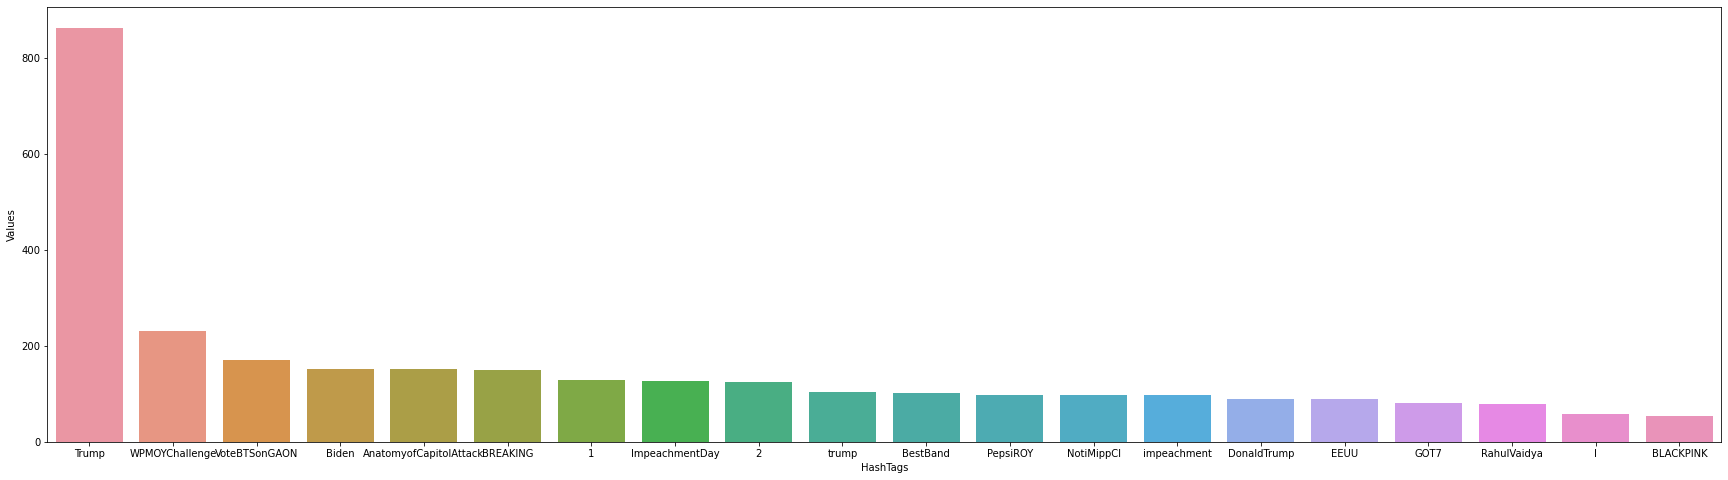

In [58]:
# selecting top 20 most frequent hashtags
hashtags = hashtags.nlargest(columns="Values", n=20)
plt.figure(figsize=(30,8))
sns.barplot(data=hashtags, x= "HashTags", y= "Values")